<ipython-input-1-8e556ba43704>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-1-8e556ba43704>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

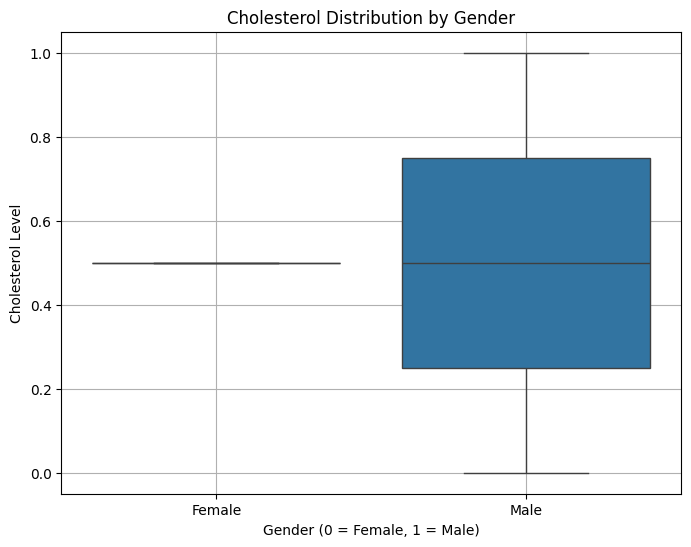

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Alice'],
    'Age': [25, np.nan, 30, 22, 25, 25],
    'Sex': ['F', 'M', 'M', 'M', 'F', 'F'],
    'BP': ['High', 'Low', 'Medium', np.nan, 'High', 'High'],
    'Cholesterol': [np.nan, 200, 180, 220, 200, 200]
}
df = pd.DataFrame(data)

def fill_missing_values(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['BP'].fillna(df['BP'].mode()[0], inplace=True)
    df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)
    return df

df_filled = fill_missing_values(df.copy())

def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

df_no_duplicates = remove_duplicates(df_filled.copy())

def categorize_data(df):
    df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
    df['BP'] = df['BP'].map({'Low': 0, 'Medium': 1, 'High': 2})
    return df

df_categorized = categorize_data(df_no_duplicates.copy())

def normalize_data(df):
    numeric_columns = ['Age', 'Cholesterol']
    df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())
    return df

df_normalized = normalize_data(df_categorized.copy())

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Cholesterol', data=df_normalized)
plt.title('Cholesterol Distribution by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(True)
plt.show()
